# Using R to Build and Evaluate a Basic Decision Tree Model

First, we need in import the various libraries we require for our analysis.

In [27]:
library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(caret)
library(repr)
library(tidyverse)

options(repr.plot.width=15, repr.plot.height=15)

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [17]:
## Get the data from a csv file

titanic <- read.csv("titanic.csv")

### Examine Data

You can print out the dataframe by running a codeblock with the dataframe name in it- in this case ```titanic```. You can also use the ```summary``` command to see various summary statistics.

In [18]:
## Examine dataframe

titanic

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.0750
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333


Looking at your data is critical before you start doing any analysis. In this specific dataset, the "Survived" column indicates whether the individual survived ("1') or prerished ("0"). So, "1" is the positive case.

In [26]:
summary(titanic)

    Survived          Pclass          Name               Sex           
 Min.   :0.0000   Min.   :1.000   Length:887         Length:887        
 1st Qu.:0.0000   1st Qu.:2.000   Class :character   Class :character  
 Median :0.0000   Median :3.000   Mode  :character   Mode  :character  
 Mean   :0.3856   Mean   :2.306                                        
 3rd Qu.:1.0000   3rd Qu.:3.000                                        
 Max.   :1.0000   Max.   :3.000                                        
      Age        Siblings.Spouses.Aboard Parents.Children.Aboard
 Min.   : 0.42   Min.   :0.0000          Min.   :0.0000         
 1st Qu.:20.25   1st Qu.:0.0000          1st Qu.:0.0000         
 Median :28.00   Median :0.0000          Median :0.0000         
 Mean   :29.47   Mean   :0.5254          Mean   :0.3833         
 3rd Qu.:38.00   3rd Qu.:1.0000          3rd Qu.:0.0000         
 Max.   :80.00   Max.   :8.0000          Max.   :6.0000         
      Fare        
 Min.   :  0.000  
 1s

In [19]:
## 75% sample for training data
sample_size <- floor(0.75 * nrow(titanic))

In [20]:
## Use seed to make models reproduceable
set.seed(123)

## Determine the row numbers to sample
train_split <- sample(seq_len(nrow(titanic)), size = sample_size)

In [21]:
## Split the data into 75% training and 25% testing
train <- titanic[train_split, ]
test <- titanic[-train_split, ]

## Validate that the dataframes are correct

cat("There are ", nrow(train), " rows in the training data. \n")
cat("There are ", nrow(test), " rows in the testing data.")

There are  665  rows in the training data. 
There are  222  rows in the testing data.

http://www.milbo.org/doc/prp.pdf

In [22]:
## Build a decision tree model
my_tree <- rpart(Survived ~ Pclass + Sex + Age + Siblings.Spouses.Aboard + Parents.Children.Aboard + Fare, data = train, method = "class")



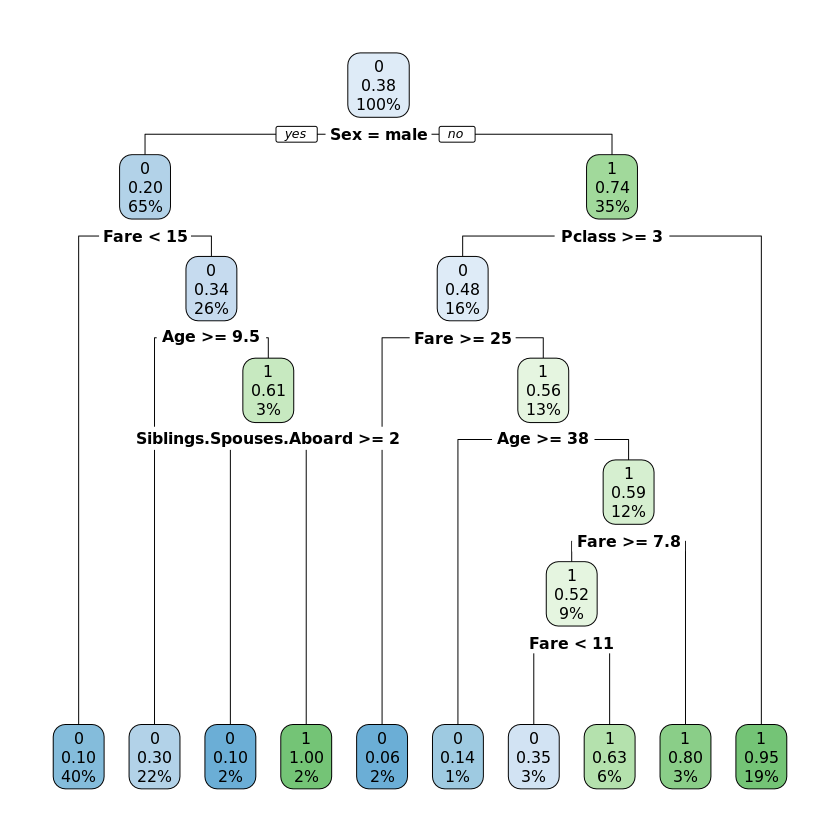

In [23]:
## Plot the model results
rpart.plot(my_tree)

In [24]:
rpart.rules(my_tree)

,Survived,,.1,.2,.3,.4,.5,.6,.7,.8,⋯,,.1,.2,.3,.4,.5,.6,.7,.8,.9
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
12,0.06,when,Sex,is,female,&,Fare,>=,,,⋯,,,&,Pclass,>=,3,,,,
22,0.10,when,Sex,is,male,&,Fare,>=,,,⋯,<,9.5,,,,,&,Siblings.Spouses.Aboard,>=,2
4,0.10,when,Sex,is,male,&,Fare,<,15.2,,⋯,,,,,,,,,,
26,0.14,when,Sex,is,female,&,Fare,<,24.8,,⋯,>=,38.0,&,Pclass,>=,3,,,,
10,0.30,when,Sex,is,male,&,Fare,>=,,,⋯,>=,9.5,,,,,,,,
108,0.35,when,Sex,is,female,&,Fare,is,7.8,to,⋯,<,38.0,&,Pclass,>=,3,,,,
109,0.63,when,Sex,is,female,&,Fare,is,10.8,to,⋯,<,38.0,&,Pclass,>=,3,,,,
55,0.80,when,Sex,is,female,&,Fare,<,7.8,,⋯,<,38.0,&,Pclass,>=,3,,,,
7,0.95,when,Sex,is,female,,,,,,⋯,,,&,Pclass,<,3,,,,


In [25]:
## Create the probabilities for each test data point
predict_probs <- as.data.frame(predict(my_tree, newdata = test, type = "p"))

## Create the predicted test values and ground truth values and .5 threshold value
predicted <- as.integer(predict_probs$`1` > .5)
actual <- test$Survived

## Build confusion matrix
confusionMatrix(as.factor(predicted), as.factor(actual), positive = "1")

## https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  31
         1   8  55
                                         
               Accuracy : 0.8243         
                 95% CI : (0.7678, 0.872)
    No Information Rate : 0.6126         
    P-Value [Acc > NIR] : 6.659e-12      
                                         
                  Kappa : 0.6107         
                                         
 Mcnemar's Test P-Value : 0.000427       
                                         
            Sensitivity : 0.6395         
            Specificity : 0.9412         
         Pos Pred Value : 0.8730         
         Neg Pred Value : 0.8050         
             Prevalence : 0.3874         
         Detection Rate : 0.2477         
   Detection Prevalence : 0.2838         
      Balanced Accuracy : 0.7904         
                                         
       'Positive' Class : 1              
                                         